# Q6

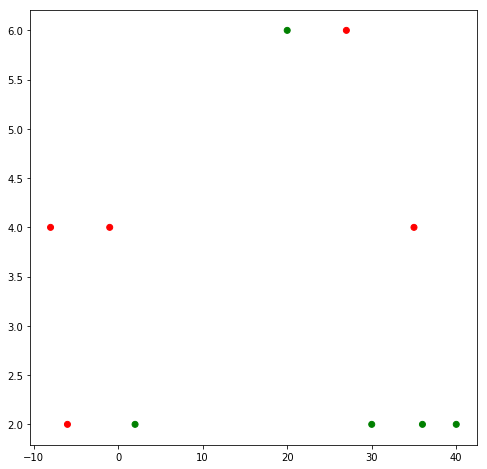

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

ids = [1,2,3,4,5,6,7,8,9,10]
x = [27,-6,2,36,-8,40,35,30,20,-1]
y = [6,2,2,2,4,2,4,2,6,4]
label = [-1,-1,1,1,-1,1,-1,1,1,-1]
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

# cb = plt.colorbar()
# loc = np.arange(0,max(label),max(label)/float(len(colors)))
# cb.set_ticks(loc)
# cb.set_ticklabels(colors)

In [24]:
import math

In [25]:

ids = [1,2,3,4,5,6,7,8,9,10]
x = [27,-6,2,36,-8,40,35,30,20,-1]
y = [6,2,2,2,4,2,4,2,6,4]
label = [-1,-1,1,1,-1,1,-1,1,1,-1]
dataset = list(zip(ids,x,y,label))

In [26]:
dataset

[(1, 27, 6, -1),
 (2, -6, 2, -1),
 (3, 2, 2, 1),
 (4, 36, 2, 1),
 (5, -8, 4, -1),
 (6, 40, 2, 1),
 (7, 35, 4, -1),
 (8, 30, 2, 1),
 (9, 20, 6, 1),
 (10, -1, 4, -1)]

In [47]:
#Helper Method to find euclidian distance between two datapoints
def find_euclidian_distance(x,y):
    sum = 0
    sum += (x[1] - y[1]) ** 2
    sum += (x[2] - y[2]) ** 2
    return math.sqrt(sum)

In [48]:
find_euclidian_distance(dataset[0],dataset[1])

33.24154027718932

# Q6(A)

### 3 Nearest datapoints for data point ID : 5

In [54]:
dist = []
for i in range(0,10):
    dist.append((i+1,find_euclidian_distance(dataset[4],dataset[i])))
# dist
sorted(dist, key=lambda x: x[1])

[(5, 0.0),
 (2, 2.8284271247461903),
 (10, 7.0),
 (3, 10.198039027185569),
 (9, 28.071337695236398),
 (1, 35.05709628591621),
 (8, 38.05259518088089),
 (7, 43.0),
 (4, 44.04543109109048),
 (6, 48.041648597857254)]

In [ ]:
### ANSWER: Therefore 3 neareset negihbors for datapoint ID: 5 are {2,10,3}

In [60]:
dist = []
for i in range(0,10):
    dist.append((i+1,find_euclidian_distance(dataset[9],dataset[i])))

sorted(dist, key=lambda x: x[1])

[(10, 0.0),
 (3, 3.605551275463989),
 (2, 5.385164807134504),
 (5, 7.0),
 (9, 21.095023109728988),
 (1, 28.071337695236398),
 (8, 31.064449134018133),
 (7, 36.0),
 (4, 37.05401462729781),
 (6, 41.048751503547585)]

### Answer: Therefore 3 neareset negihbors for datapoint ID: 10 are {3,2,5}

# Q6 (B) 

In [130]:
# Experiment
from sklearn.neighbors import NearestNeighbors
import numpy as np
list_tuples = [(27, 6),
 (-6, 2),
 (2, 2),
 (36, 2),
 (-8, 4),
 (40, 2),
 (35, 4),
 (30, 2),
 (20, 6),
 (-1, 4)]
labels = np.array([-1,-1,1,1,-1,1,-1,1,1,-1])
X = np.array(list_tuples)
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# np.concatenate((X[:i],X[(i+1):]))

In [131]:
#Leave one out cross validation
total_errors = 0
for i in range(0,10):
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='auto', metric='euclidean').fit(np.concatenate((X[:i],X[(i+1):])))
    temp_labels = np.concatenate((labels[:i],labels[(i+1):]))
    distances, indices = nbrs.kneighbors([X[i]])
    
    for nearest_index in indices:
        # print(f'Nearest Index: {nearest_index[0]}')
        print(f'Testing Point: {dataset[i]} -> Nearest Point: {dataset[nearest_index[0]]}')
        if temp_labels[nearest_index[0]] != dataset[i][3]:
            total_errors += 1

print(f'Leave-one-out-cross-validation error: {total_errors/10}')

Testing Point: (1, 27, 6, -1) -> Nearest Point: (7, 35, 4, -1)
Testing Point: (2, -6, 2, -1) -> Nearest Point: (4, 36, 2, 1)
Testing Point: (3, 2, 2, 1) -> Nearest Point: (9, 20, 6, 1)
Testing Point: (4, 36, 2, 1) -> Nearest Point: (6, 40, 2, 1)
Testing Point: (5, -8, 4, -1) -> Nearest Point: (2, -6, 2, -1)
Testing Point: (6, 40, 2, 1) -> Nearest Point: (4, 36, 2, 1)
Testing Point: (7, 35, 4, -1) -> Nearest Point: (4, 36, 2, 1)
Testing Point: (8, 30, 2, 1) -> Nearest Point: (1, 27, 6, -1)
Testing Point: (9, 20, 6, 1) -> Nearest Point: (1, 27, 6, -1)
Testing Point: (10, -1, 4, -1) -> Nearest Point: (3, 2, 2, 1)
Leave-one-out-cross-validation error: 0.7


### Leave-one-out-cross-validation error: 0.7

# Q6 (C)

In [138]:
# Create Folds:
def createfolds(num_folds):
    folds = {i:{'train':[], 'test':[]} for i in range(1,num_folds+1)}
    for i in range(1,num_folds+1):
        for j in range(1,11):
            if j % 5 == i-1:
                folds[i]['test'].append(j)
            else:
                folds[i]['train'].append(j)
    return folds

In [142]:
folds = createfolds(5)
folds


{1: {'test': [5, 10], 'train': [1, 2, 3, 4, 6, 7, 8, 9]},
 2: {'test': [1, 6], 'train': [2, 3, 4, 5, 7, 8, 9, 10]},
 3: {'test': [2, 7], 'train': [1, 3, 4, 5, 6, 8, 9, 10]},
 4: {'test': [3, 8], 'train': [1, 2, 4, 5, 6, 7, 9, 10]},
 5: {'test': [4, 9], 'train': [1, 2, 3, 5, 6, 7, 8, 10]}}

In [155]:
total_errors = 0
for i in range(1,6):
    test_data = []
    test_labels = []
    train_data = []
    train_labels = []
    
    for index in folds[i]['train']:
        # print(f'Index: {index}')
        train_data.append(list_tuples[index-1])
        train_labels.append(labels[index-1])
    
    train_data_nparray = np.array(train_data)
    print(f'Train Data: {train_data_nparray}')
    # print(f'{train_labels}')
    
    for index in folds[i]['test']:
        # print(f'Index: {index}')
        test_data.append(list_tuples[index-1])
        test_labels.append(labels[index-1])
    
    test_data_nparray = np.array(test_data)
    # print(f'Test Data: {test_data_nparray}')
    
    nbrs = NearestNeighbors(n_neighbors=3, algorithm='auto', metric='euclidean').fit(train_data_nparray)
    
    distances, indices = nbrs.kneighbors(test_data_nparray)
    
    # print(f'indices: {indices}\n')
    
    k = 0
    for nearest_indices in indices:
        label_total = 0
        for near_indice in nearest_indices:
            # print(f'near_indice: {near_indice}')
            label_total += train_labels[near_indice]
            
        if label_total > 0:
            predicted_label = 1
        if label_total < 0:
            predicted_label = -1
        
        # print(f'predicted_label: {predicted_label}')
        if predicted_label != test_labels[k]:
            total_errors += 1
        
        k += 1
        
print(f'5-fold-cross-validation error: {total_errors/10}')

Train Data: [[27  6]
 [-6  2]
 [ 2  2]
 [36  2]
 [40  2]
 [35  4]
 [30  2]
 [20  6]]
indices: [[1 2 7]
 [2 1 7]]

near_indice: 1
near_indice: 2
near_indice: 7
predicted_label: 1
near_indice: 2
near_indice: 1
near_indice: 7
predicted_label: 1
Train Data: [[-6  2]
 [ 2  2]
 [36  2]
 [-8  4]
 [35  4]
 [30  2]
 [20  6]
 [-1  4]]
indices: [[5 6 4]
 [2 4 5]]

near_indice: 5
near_indice: 6
near_indice: 4
predicted_label: 1
near_indice: 2
near_indice: 4
near_indice: 5
predicted_label: 1
Train Data: [[27  6]
 [ 2  2]
 [36  2]
 [-8  4]
 [40  2]
 [30  2]
 [20  6]
 [-1  4]]
indices: [[3 7 1]
 [2 5 4]]

near_indice: 3
near_indice: 7
near_indice: 1
predicted_label: -1
near_indice: 2
near_indice: 5
near_indice: 4
predicted_label: 1
Train Data: [[27  6]
 [-6  2]
 [36  2]
 [-8  4]
 [40  2]
 [35  4]
 [20  6]
 [-1  4]]
indices: [[7 1 3]
 [0 5 2]]

near_indice: 7
near_indice: 1
near_indice: 3
predicted_label: -1
near_indice: 0
near_indice: 5
near_indice: 2
predicted_label: -1
Train Data: [[27  6]
 [-6  2]

## 5-fold cross-validation error: 0.7

# Q6 (D)

Based on the results of (B) and (C) we can not determine 
1. Data points are very less. 
2. For 5-fold cross-validation:  testing set is size of 2 and training set size is of 8. Which is almost same as for leave-one-out (where ratio for testing is 1 and training 9).
3. So, We can not determine base